In [1]:
#Importing necessary libraries to ascertain Data_set#####
import pandas as pd
import numpy as np

In [2]:
###Importing Data_set using Pandas#####
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Observations on first go========= Columns like sex,smoker,region are having text not numbers,we will use encoding to resolve the situation post other verifications on our Data set.

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# # Machine only understand numbers we could have used encoders but here i have used .replace method to provide encoding to columns which are having Text values

In [5]:
df['sex'].replace({'male':0,'female':1},inplace=True)
df['smoker'].replace({'yes':1,'no':0},inplace=True)
df['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3},inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [6]:
#Their is NAN values present in data set,we are good to proceed######
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Importing necessary Libraries again####
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Lets check the overall health of our Data using .describe method

In [8]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Observations====

1-Age=> Measure of central Tendency and Dispersion is looking satisfactory,Min and Max are also satisfactory.

2-sex=> Mean & STD are close to each others and Min & MAX values are not satisfactory

3- bmi=> Measure of central Tendency and Dispersion is looking satisfactory,but Max value of BMI indicating presence of outliers

4- children=> Mean & STD values are very close to each other, rest is looking satisfactory

5- smoker=> Measure of central Tendency and Dispersion is looking satisfactory,no values in Min and MAX could be point of concern

6 - region=> We will recheck and we will see if region is impacting the charges and accordingly we will take the decision(rest all is looking satisfactory)

In [9]:
#Importing necessary Libraries again####
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# # According to my Pre observation on data i suspected outliers in BMI and i am checking the same by plotting BOX PLOT with adjunct to check on Min and Max values

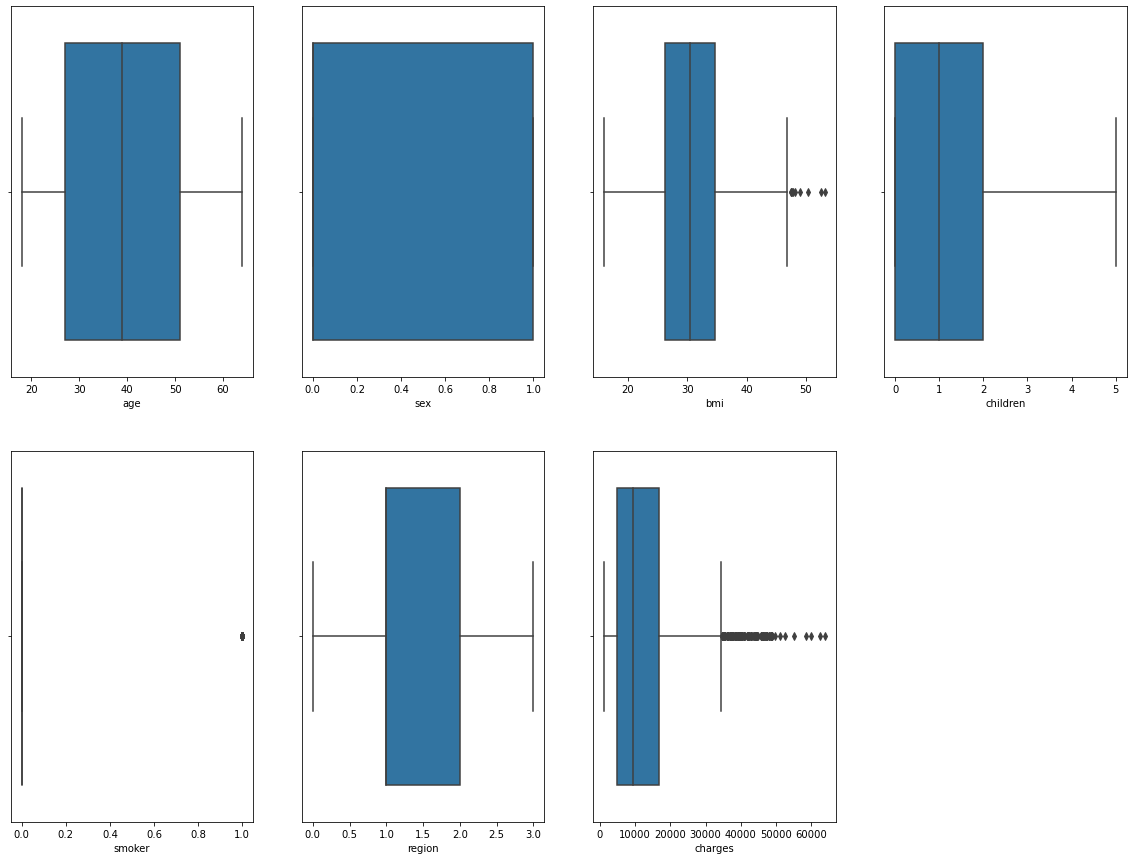

In [13]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1    

        
plt.show()        

========As expected BMI is showing outliers on higher side,Lets treat the outliers first=============
****we are deleting outliers here i have verified from official site of ICMR that maximum mean BMI of average person is 29,hence we are having 53 as maximum value which is not a realistic value****

In [14]:
#####Ascertaining values of outliers#######
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = Q3-Q1

In [15]:
###Any value above this BMI_high value is a outlier#####
BMI_high = (Q3.bmi+(1.5*IQR.bmi))
###Finding the indexes where value is above the BMI_high value#####
index=np.where(df['bmi']>BMI_high)
df = df.drop(df.index[index]) 


In [16]:
###checking the shape of data set again after treating outliers######
df.shape

(1329, 7)

# Lets check the distribution of data set as we know the assumption that continuous data will always form a Normal distribution and we have also treated the outliers

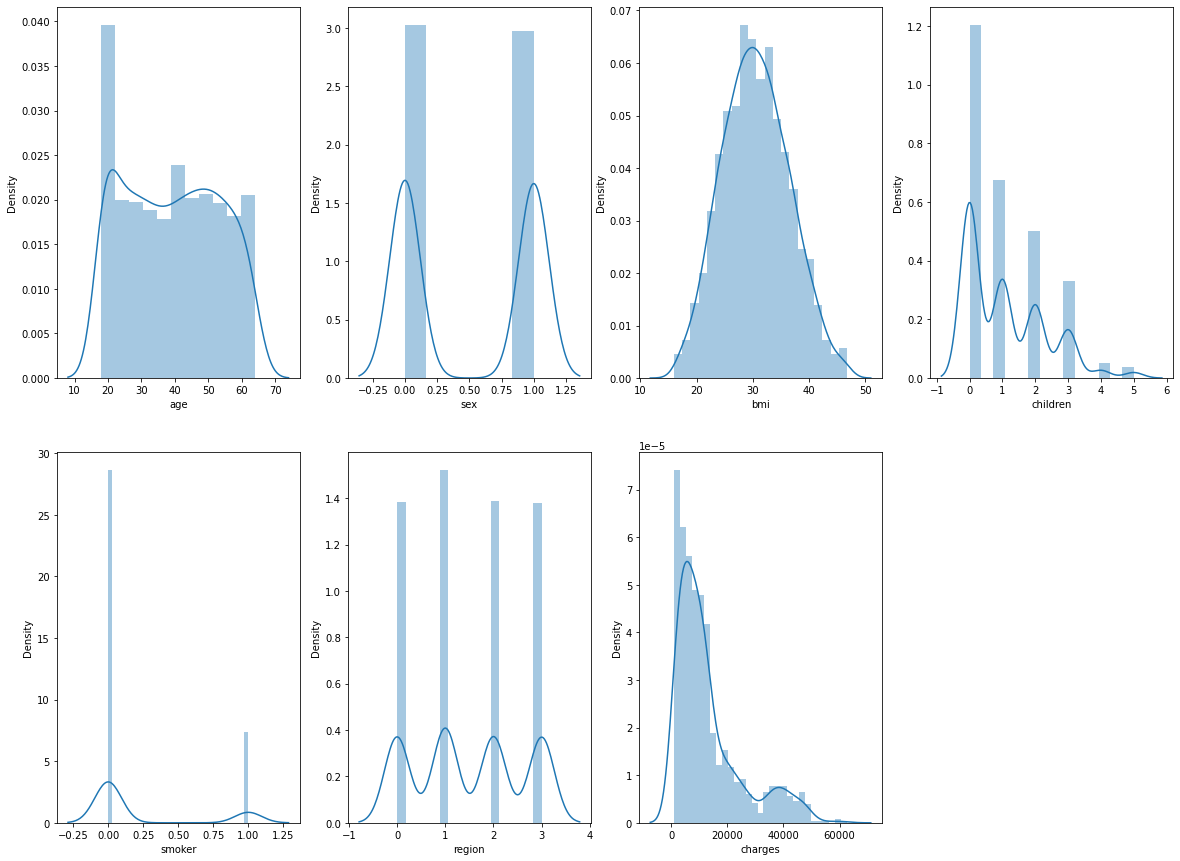

In [17]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        
    plotnumber+=1
    
plt.show()    

we have seen in visualization part outiers for BMI has been corrected

Lets seprate Label and Features for checking if all features and contributing to Label

In [18]:
x=df.drop(columns=['charges'])
y = df['charges']

# Feature VS Label

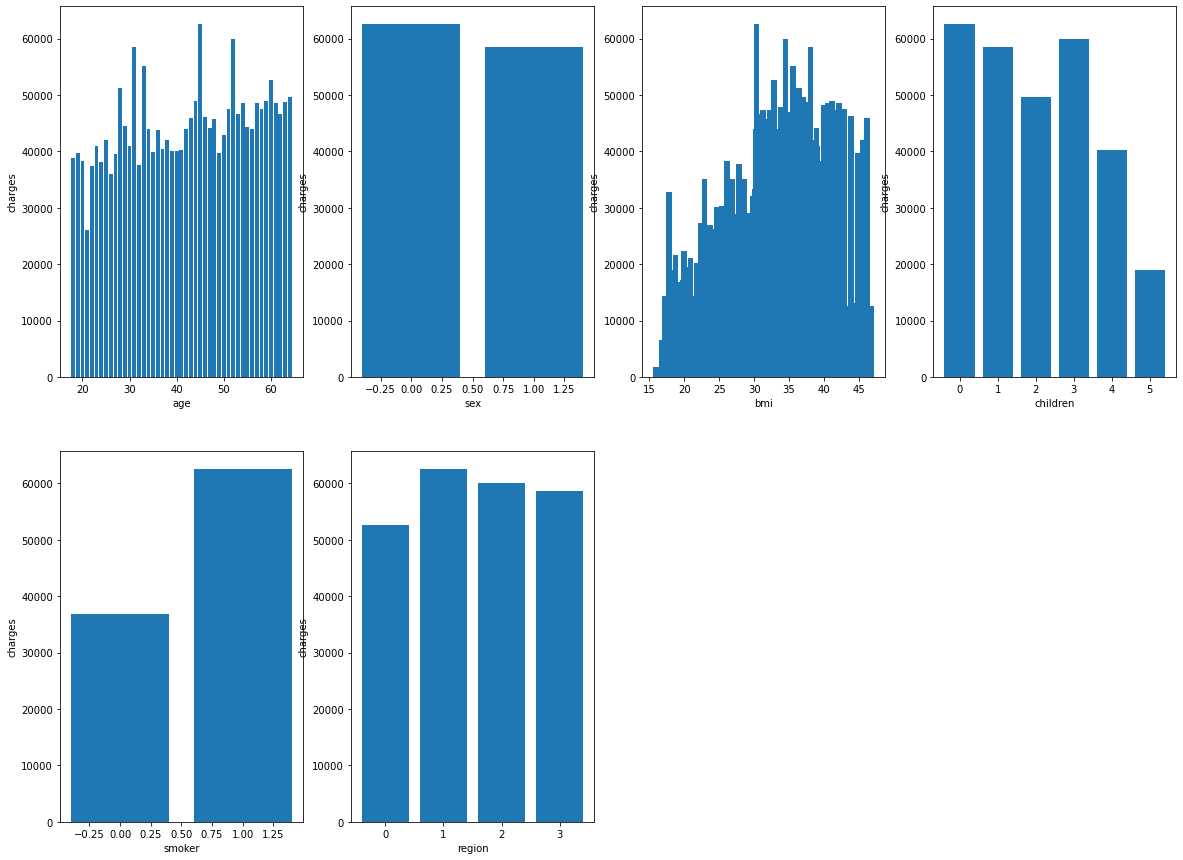

In [19]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.bar(x[column],y)
        plt.xlabel(column)
        plt.ylabel('charges')
        
    plotnumber+=1
    
plt.show()    

Observations-----

1.Charges=> visualization is depicting with less the age less the charges more the age more the charges

2.Sex=> Males are just above the females in term of charges.

3.BMI=> When BMI value is b/w 30-40 the charges are tend to increase

4.Children=> with increase in number of childrens charges are decreasing,this might show chances of multi-collinearity

5.Smoker=> If a person is smoker he/she tends to pay more charges

6.Region=> Regions are showing no big effect regionwise on charges we may delete this feature to save our time

# # Lets recheck the observations and Multi-Collinearity by plotting Heat map

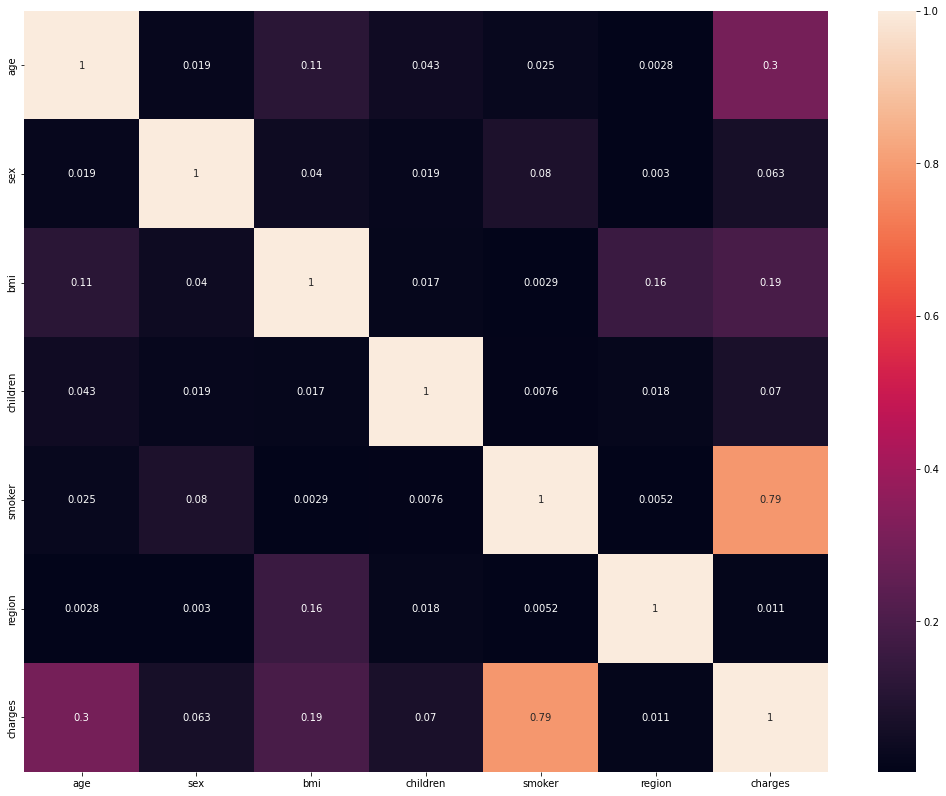

In [20]:
df_corr=df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True)
plt.show()

***NO Multi-collinearity problem has been visualized***

In [21]:
##Importing necessary Libraries####
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
###Initiating object for standard scaler#####
scaler = StandardScaler()

In [23]:
##Scaling of data#####

x_scaled= scaler.fit_transform(x)

In [24]:
#Applying train_test_split for training and testing of data#####
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=21)

In [25]:
#Creating object for Linear Regression algorithm####
LR = LinearRegression()

In [26]:
###Model learning on training Data#####
LR.fit(x_train,y_train)

LinearRegression()

In [27]:
##Model training of testing data####
LR.fit(x_test,y_test)

LinearRegression()

# Training Score

In [28]:
LR.score(x_train,y_train)

0.7497680382834926

# Testing score

In [29]:
LR.score(x_test,y_test)

0.7442045176133333

# # Lets check with evaluation metric Adjusted R2_Score for Model confidence

In [30]:
from sklearn.metrics import r2_score

# R2_Score with Training Data

In [31]:
x_pred=LR.predict(x_train)
r2_score(y_train,x_pred)

0.7497680382834926

# R2_score with Testing Data

In [32]:
y_pred = LR.predict(x_test)
r2_score(y_test,y_pred)

0.7442045176133333

# we got 74% of score in all above segments,which is a good sign. Lets try LASSO and RIDGE Regressions to check whether model is overfitted or not

In [33]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Giving iterations to learn model

In [34]:
Lassocv=LassoCV(max_iter=200,normalize=True)

***Training with Lasso Regression on Training Data****

In [35]:
Lassocv.fit(x_train,y_train)

LassoCV(max_iter=200, normalize=True)

***Taking the alpha number at which model should initiate train***

In [36]:
alpha_num = Lassocv.alpha_
alpha_num

0.4084149804242181

***Initiating Lasso Regression with Alpha number***

In [37]:
lasso_reg = Lasso(alpha_num)

***Model Training using Lasso Regression on Training Data***

In [38]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.4084149804242181)

****Training Score using Lasso Regression***

In [39]:
lasso_reg.score(x_train,y_train)

0.7534068004989788

***Testing Score using Lasso Regression***

In [40]:
lasso_reg.score(x_test,y_test)

0.7406377433546463

# In Lasso Regression it is also giving us 74%score,Lets use Ridge Regression to cross verify the result

In [41]:
ridgecv_=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

In [42]:
###Training using Ridge Regression####
ridgecv_.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [43]:
alpha_num_ridge=ridgecv_.alpha_
alpha_num_ridge

0.001

In [44]:
Ridge_model = Ridge(alpha=alpha_num_ridge)

In [45]:
Ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

# Model Training score using Ridge Regression

In [46]:
Ridge_model.score(x_train,y_train)

0.7534068083682284

In [47]:
Ridge_model.fit(x_test,y_test)

Ridge(alpha=0.001)

# Model Testing Score using Ridge Regression

In [48]:
Ridge_model.score(x_test,y_test)

0.7442045176099783

# By using Ridge Regression we have ascertained 74% score again,it concludes that our Model is not Overfitting and Score is also satisfactory

***Lets check overall error of Model using MAE,MSE,RMSE

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [50]:
mean_absolute_error(y_test,y_pred)

4472.1160184824375

In [51]:
mean_squared_error(y_test,y_pred)

40327983.38802577

In [52]:
##Root mean squared error
np.sqrt(40327983.38802577)

6350.431748159

# Model Building using ADA Boost Regressor

In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
###Initiating object for AdaBoostRegressor###
ada= AdaBoostRegressor()

In [55]:
###Model Training using Ada Boost Regressor###
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [56]:
###Predicting values in x_train for comparing with y_train###
x_pred= ada.predict(x_train)

In [57]:
####R2 score on Training Data using AdaBoost Regressor###
r2_score(y_train,x_pred)

0.8410111055774325

In [58]:
##Predicting values in x-test for comparing with y_test### 
y_pred = ada.predict(x_test)

In [59]:
###Testing score using Ada Boost Regressor#####
r2_score(y_test,y_pred)

0.8206985595028016

# We have got a good score by using AdaBoostRegressor, Lets try HYPERPARAMETER TUNINGand see if score increases

In [60]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [61]:
AdaBoostRegressor()

AdaBoostRegressor()

In [62]:
###Giving best parameters to Search upon####
params={'n_estimators':[45,50,55,60,70],'learning_rate':[1,2,3,4,5]}

In [63]:
#3Giving RandomizedSearchCV the estimator ,cross validations,param_distribution###
rndn_search = RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [64]:
##Model training on Training Data###
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [1, 2, 3, 4, 5],
                                        'n_estimators': [45, 50, 55, 60, 70]})

In [65]:
###Finding the best estimators###
rndn_search.best_estimator_

AdaBoostRegressor(learning_rate=1)

In [66]:
ada = AdaBoostRegressor(learning_rate=0.01,n_estimators=70)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=70)

In [67]:
y_predict = ada.predict(x_test)

In [68]:
from sklearn import metrics

In [69]:
print("===========Score post Hyper Parameter Tuning is==========")

metrics.r2_score(y_test,y_predict)

===========Score post Hyper Parameter Tuning is==========


0.8460247692788975

# we got 84% score post HyperParameter  Tuning using RandomizedSeachCV,Lets cross check the same by using GridSearchCV

In [70]:
g_params ={'n_estimators':[30,40,50,60],'learning_rate':[0.25,0.30,0.40,0.70,1]}

In [71]:
grid_search= GridSearchCV(AdaBoostRegressor(),param_grid=g_params)

In [72]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.25, 0.3, 0.4, 0.7, 1],
                         'n_estimators': [30, 40, 50, 60]})

In [73]:
grid_search.best_params_

{'learning_rate': 0.3, 'n_estimators': 60}

In [74]:
grid= AdaBoostRegressor(learning_rate=1,n_estimators=60)

In [75]:
y_pred= ada.predict(x_test)

In [76]:
print("=======Testing Score post Hyper Parameter tuning using GridSearchCV=======")
metrics.r2_score(y_test,y_pred)

=======Testing Score post Hyper Parameter tuning using GridSearchCV=======


0.8460247692788975

***We have again got 84% score post HyperParameter tuning using GridSearchCV***
***Lets check MAE,MSE,RSME for this***

In [77]:
mean_absolute_error(y_test,y_pred)

3078.295823380734

In [78]:
mean_squared_error(y_test,y_pred)

24275294.03080548

In [79]:
print("Root mean squared error===",np.sqrt(24259598.86106933))

Root mean squared error=== 4925.40342114931


# Model building using KNN Regressor

In [80]:
##Importing necessary Library####
from sklearn.neighbors import KNeighborsRegressor

In [81]:
##Creating object for algorithm####
Knn=KNeighborsRegressor()

In [82]:
##Model training###
Knn.fit(x_train,y_train)

KNeighborsRegressor()

In [83]:
y_pred= Knn.predict(x_test)

In [84]:
print("Training score without Hyperparameter tuning is====",Knn.score(x_train,y_train))

Training score without Hyperparameter tuning is==== 0.8718415084358451


In [85]:
print("Testing score without Hyperparameter Tuning is =====",Knn.score(x_test,y_test))

Testing score without Hyperparameter Tuning is ===== 0.8089911227541022


# Hyperparameter Tuning

In [86]:
params= {'algorithm':['ball_tree', 'kd_tree', 'brute'],
                      'leaf_size':[20,30,40,50],
                      'n_neighbors':[3,5,7,9,11,13]}

In [87]:
grid_knn = GridSearchCV(estimator=Knn,param_grid=params)

In [88]:
grid_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40, 50],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [89]:
grid_knn.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 7}

In [90]:
knn = KNeighborsRegressor(algorithm='ball_tree',leaf_size=20,n_neighbors=7)

In [91]:
y_pred = Knn.predict(x_test)

In [92]:
print("Score Post Hyperparameter Tuning is======",metrics.r2_score(y_test,y_pred))

Score Post Hyperparameter Tuning is====== 0.8089911227541022


***Calculating MAE,MSE,RSME for KNN algorithm***

In [93]:
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_pred))

Mean Absolute Error is===== 3130.8506026287014


In [94]:
print("Mean squared error is======",mean_squared_error(y_test,y_pred))

Mean squared error is====== 30113912.71130414


In [95]:
print("Root mean squared error===",np.sqrt(30113912.71130414))

Root mean squared error=== 5487.614482751512


# Model building using Gradient Boosting Regressor

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
gbr = GradientBoostingRegressor()

In [98]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [99]:
print("Training score without hyperparameter tuning is======",gbr.score(x_train,y_train))

Training score without hyperparameter tuning is====== 0.9157626973397918


In [100]:
y_predict = gbr.predict(x_test)

In [101]:
print("Testing score without Hyperparameter Tuning is",metrics.r2_score(y_test,y_predict))

Testing score without Hyperparameter Tuning is 0.8432240829995472


***Hyperparameter Tuning***

In [102]:
params={'min_samples_split':[2,3,4],
       'min_samples_leaf':[2,3,4],
       'max_depth':[2,3,4],
       'learning_rate':[0.1,0.2,0.3]}

In [103]:
rndn_search = RandomizedSearchCV(GradientBoostingRegressor(),cv=5,param_distributions=params)

In [104]:
rndn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4]})

In [105]:
rndn_search.best_estimator_

GradientBoostingRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=3)

In [106]:
gbr=GradientBoostingRegressor(learning_rate=0.1, max_depth=2, min_samples_leaf=3,min_samples_split=4)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=2, min_samples_leaf=3, min_samples_split=4)

In [107]:
y_predict=gbr.predict(x_test)

In [108]:
print("Score Post Hyperparameter Tuning is========",metrics.r2_score(y_test,y_predict))

Score Post Hyperparameter Tuning is======== 0.8500351393042953


In [109]:
##Printing all evaluation score for GradientBoostingRegressor####
print("Mean Absolute Error is=====",mean_absolute_error(y_test,y_predict))
print("Mean squared error is======",mean_squared_error(y_test,y_predict))
print("Root mean squared error===",np.sqrt(23643030.57464481))

Mean Absolute Error is===== 2679.1910576863484
Mean squared error is====== 23643030.574644804
Root mean squared error=== 4862.409955427947


***I have analyzed the scores of each and every Model here in can conclue that Linear Regression model is giving us the best score even after LASSO,RIDGE score is same on training and testing data.

# Saving the Final model

In [110]:
import pickle

In [111]:
pickle.dump(LR,open('Regression_Medical_charges','wb'))

# Model is completed